# Basic C# Syntax

## PRINT STATEMENTS

In [1]:
Console.WriteLine("i am a print statement");
Console.Write("same line");
Console.Write("same line");

i am a print statement
same linesame line

<hr>

## COMMENTS

### Single-Line Comments

In [ ]:
// blah blah blah

### Multi-Line Comments

In [ ]:
/*
blah
    blah
        blah
*/

### Documentation Comments (Docstring)

In [ ]:
class User
{
    /// <summary>
    /// The Name of the User.
    /// </summary>
    public string Name { get; set; }

    /**
    * <summary>The Age of the User.</summary>
    */
    public string Age { get; set; }
}

User u = new User();
u.Name


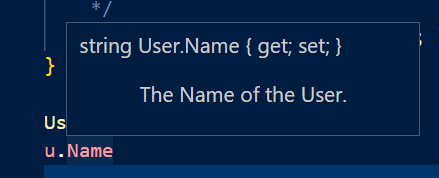

<hr>

## SIMPLE BUILT-IN DATA TYPES

|Data Type|Struct Type|Default Value|Size|Range Limit MIN|Range Limit MAX|Signed?|
|:----|:----|:----|:----|:----|:----|:----|
|`sbyte` (`System.SByte`)|Integral|0|8-bit|-128|127|Yes|
|`byte` (`System.Byte`)|Integral|0|8-bit|0|255|No|
|`short` (`System.Int16`)|Integral|0|16-bit|-32,768|32,767|Yes|
|`ushort` (`System.UInt16`)|Integral|0|16-bit|0|65,535|No|
|`int` (`System.Int32`)|Integral|0|32-bit|-2,147,483,648 *(billion)*|2,147,483,647 *(billion)*|Yes|
|`uint` (`System.UInt32`)|Integral|0|32-bit|0|4,294,967,295 *(billion)*|No|
|`long` (`System.Int64`)|Integral|0|64-bit|-9,223,372,036,854,770,000 *(quintillion)*|9,223,372,036,854,770,000 *(quintillion)*|Yes|
|`ulong` (`System.UInt64`)|Integral|0|64-bit|0|18,446,744,073,709,500,000 *(quintillion)*|No|
|`float`<sup>*a*</sup> (`System.Single`)|Floating-point (IEEE binary)|0.0f|32-bit (~6-9 digit precision)|-1.5 x 10<sup>-45</sup> *(quatturordecillion)*|3.4 x 10<sup>38</sup> *(undecillion)*|Yes|
|`double`<sup>*a*</sup> (`System.Double`)|Floating-point (IEEE binary)|0.0d|64-bit (~15-16 digit precision)|-5.0 x 10<sup>-324</sup> *(more than a centillion)*|1.7 x 10<sup>308</sup> *(more than a centillion)*|Yes|
|`decimal`<sup>*b*</sup> (`System.Decimal`)|Numeric (floating-point high-precision)|0m|128-bit (~28-29 digit precision)|-7.9 x 10<sup>-28</sup> *(sexvigintillion)*|7.9 x 10<sup>28</sup> *(sexvigintillion)*|Yes|
|`char`<sup>*c*</sup> (`System.Char`)|Integral|`'\x0000'`|16-bit integers|0|65,535|No|
|`bool`<sup>*d*</sup> (`System.Boolean`)|Boolean|`false`|*N/A*|*N/A*|*N/A*|*N/A*|


<br>


__Footnotes:__

*a*: Considerations for the `float` and `double` types:
* `float` and `double` types never produce exceptions, only the following:
    * Zero (positive or negative)
    * Not-A-Number value (`NaN`)
    * Infinity (1.0/0.0 and -1.0/0.0)
* 0.0/0.0 or any other invalid floating point operation results in a `NaN` value


*b*: Considerations for the `decimal` type:
* often used for financial calculations
* represented as an integer scaled by a power of ten (e.g. `1.0m` is 1.0 with at least 28 zeros after the decimal)
* operations are performed with `double` precision
* `decimal` to `float/double` conversions *may* result in loss of precision or an overflow exception
* `float/double` conversions *may* result in overflow exceptions

*c*: Considerations for the the `char` type:
* Represents unicode values (UTF-16)
* e.g. `char(10)` == `\x000A`

*d*: Considerations for the the `bool` type:
* Cannot be used in place of an integral value type (e.g. `int`) and vice versa
    * this is unlike Python where 1 and 0 can be interchangable with `True` and `False`

<br>

__NOTE: Numbers stored in a data type that is too small will result in a `System.OverflowException` error, except `float` and `double` types (*see footnote 'a'*).__


<hr>

## ACCESS MODIFIERS

| Access Modifier      | Visibility                                                                                                 |
| -------------------- | ---------------------------------------------------------------------------------------------------------- |
| `public`             | Accessible from anywhere                                                                                   |
| `private`            | Accessible only within the same class or struct                                                            |
| `protected`          | Accessible within the same class and derived classes, or within the same assembly (for protected internal) |
| `internal`           | Accessible within the same assembly/project                                                                        |
| `protected internal` | Accessible within the same assembly/project and from derived classes, even in different assemblies                 |


*NOTE: Members with an `override` modifier must match the accessor of what is being overridden.*

<hr>

## REFERENCE DATA TYPES

* Class Types
    * `object`: ultimate base class of all types
    * `string`: sequence of UTF-16 unicode `char` units
    * custom user created classes `class CExample {...}`
* Interfaces: defines a contract (*interface*) that declare capabilities that can be shared among distinct types such as classes/structs 
    * e.g. `System.Collections.Generic.IEnumerable<T>` is a consistent way to traverse through a collection such as an array
    * Capable of inheriting from multiple other interfaces
    * `interface IExample {...}`
* Arrays `int[]`, `int[,]`, `int[][]`
* Delegates: provides a "late binding" mechanism where an algorithm supplies a common method that is used in said algorithm
    * e.g. `Sort()` in an application that needs to use `Sort()` but for different sort options: names from A-Z, Z-A, longest to shortest, etc.
    * `delegate int DExample(...)`

<hr>

## EXCEPTION HANDLING

In [1]:
string s = "string string i am a string";
try
{
    
    int s_len = s.Length;
    Console.WriteLine(s[s_len]);
}
catch(IndexOutOfRangeException ex)
{
    Console.WriteLine("an index was out of range");
}
catch(Exception ex)
{
    Console.WriteLine("some other error occured: " + ex.Message);
}
finally
{
    Console.WriteLine("execute, exception or not");
}

an index was out of range
execute, exception or not


<hr>

## IMPLICIT TYPE VARIABLES (`var` vs `dynamic`)

### `var`
* *STATIC -- Once assigned, data type is immutable and cannot be implictly converted w/ re-assignment.
* Potentially error-prone (less so than dynamic), but not performance intensive, will be resolved/checked at compile-time (see cell below)

In [8]:
var bleh = "bleh";
bleh = 5; // ERROR: "Cannot implicitly convert type 'int' to 'string'.

Error: (2,8): error CS0029: Cannot implicitly convert type 'int' to 'string'

### `dynamic`

* \*Technically\* not statically typed (kinda similar to pythonic variable types)
* assignment data type is unknown at compile time (similar to `object`, in fact, `dynamic` is pretty much considered an `object` at run time.) 
* `dynamic` declaration types are resolved at runtime.

__NOTE: Might be error-prone since complier is unable to type check and a bit performance intensive to use frequently within a program, see [here](https://learn.microsoft.com/en-us/dotnet/framework/performance/performance-tips).__
* Also the [boxing/unboxing process](https://learn.microsoft.com/en-us/dotnet/csharp/programming-guide/types/boxing-and-unboxing) seems to be taking place when `dynamic` is pretty much being considered an `object` and the type has to be determined by the CLR instead of at compile time.

In [6]:
dynamic x = "bleh";

x = 5; // allows for implicit conversion from string to int

Console.WriteLine(x);

5


<hr>

## TYPE CASTING

In [2]:
// will result in an implicit conversion error
decimal x = 10;
int y = x;

Console.WriteLine(y);

Error: (3,9): error CS0266: Cannot implicitly convert type 'decimal' to 'int'. An explicit conversion exists (are you missing a cast?)

In [3]:
decimal x = 10;
int y = (int)x; //type casting

Console.WriteLine(y);

10


<hr>

## ENUMS

* Defines a set of constants that is comprised of integral numeric types (default: `int`).
* Explicit definitions are not required (will start and increment with index 0)

In [12]:
[Flags] // allows for combination of enums via bitwise logical operators (All)
public enum Seasons
{
    None = 0,
    Summer = 1,
    Autumn = 2,
    Winter = 4,
    Spring = 8,
    All = Summer | Autumn | Winter | Spring
}


var spring = Seasons.Spring;
var startingOnEquinox = Seasons.Spring | Seasons.Autumn;
var theYear = Seasons.All;

Console.WriteLine(spring);
Console.WriteLine(startingOnEquinox);
Console.WriteLine(theYear);

Spring
Autumn, Spring
All


<hr>

## NULLABLE TYPES

`System.Nullable<T>`

In [ ]:
int? optionalInt = default; 
optionalInt = 5;
string? optionalText = default;
optionalText = "Hello World.";

<hr>

## KEYBOARD INPUT

### Regular C# version:

In [8]:
Console.Write("Enter any string: ");
string str = Console.ReadLine(); // Doesn't work in Jupyter Notebooks .NET Interactive

### Jupyter Notebook version:

In [2]:
using Microsoft.DotNet.Interactive;

string str = await Kernel.GetInputAsync("Enter any string: ");
Console.WriteLine($"Inputted string: {str}");

Inputted string: bread


<hr>

## COMMON OPERATORS & OPERATIONS

In [27]:
int a, b, c, d, e;
a = 2;
b = 4;
c = 6;
d = 8;
e = 10;

// OR
// int a = 2, b = 4, c = 6, d = 8, e = 10;

### Arithmetic Operators

In [28]:
a = a + 2;
b = b - 1;
c = c * 2;
d = d / 1;
e = 10 % 2;

Console.WriteLine($"a: {a} \nb: {b} \nc: {c} \nd: {d} \ne: {e}");

a: 4 
b: 3 
c: 12 
d: 8 
e: 0


### Relational Operators

In [29]:
bool result_equal = (a == b);
bool result_notequal = (a != b);
bool result_greater = (a > 1);
bool result_greater_equal = (a >= 1);
bool result_lesser = (d < 1);
bool result_lesser_equal = (d <= 1);

Console.WriteLine($"{result_equal}\n{result_notequal}\n{result_greater}\n{result_greater_equal}\n{result_lesser}\n{result_lesser_equal}")

False
True
True
True
False
False


### Logical Operators

In [30]:
bool result_and = (result_greater && result_lesser);
bool result_or = (result_greater || result_lesser);
bool result_not = !(result_greater || result_lesser);

Console.WriteLine($"{result_and}\n{result_or}\n{result_not}")

False
True
False


### Increment and Decrement Operators

In [31]:
/* BEFORE */
Console.WriteLine($"a: {a}, b: {b}, c: {c}");

c++; //increment by one; same as --> c = c + 1
b = a--; //decrement by one; same as --> b = a - 1

/* AFTER */
Console.WriteLine($"a: {a}, b: {b}, c: {c}");

a: 4, b: 3, c: 12
a: 3, b: 4, c: 13


In [32]:
int num1 = 10;
num1 = num1++;
int num2 = 10;
num2 = ++num2;
Console.WriteLine($"Increment after printing: {num1}");
Console.WriteLine($"Increment before printing: {num2}");

Increment after printing: 10
Increment before printing: 11


### Compound Assignment Operators

In [33]:
a += 1; //same as --> a = a + 1
b -= 2; //same as --> b = b - 2;
c *= 10; //same as --> c = c * 10;
d /= 2; //same as --> d = d / 2
e %= 2; //same as --> d = d % 2

Console.WriteLine($"a: {a} \nb: {b} \nc: {c} \nd: {d} \ne: {e}");

a: 4 
b: 2 
c: 130 
d: 4 
e: 0


### Ternary Operator (shortened if-else statement)

In [34]:
/* BEFORE */
Console.WriteLine($"a: {a}, b: {b}, c: {c}");

c = a >= 100 ? b : c / 10; // Condition ? valueIfTrue : valueIfFalse

/* AFTER */
Console.WriteLine($"c: {c}");

a: 4, b: 2, c: 130
c: 13


<hr>

## CONDITIONAL STATEMENTS

### if -- else if -- else Statement

In [35]:
if (a % 2 == 0) {
    Console.WriteLine($"{a} is even.");
}
else if (a % 2 != 0) {
    Console.WriteLine($"{a} is odd.");
}
else {
    Console.WriteLine("not a number i guess");
}

4 is even.


### Switch Statement

In [36]:
string hungry = "yes";

switch(hungry) {
    case "yes":
        Console.WriteLine("food food food");
        break;
    case "no":
        Console.WriteLine("no food no food no food");
        break;
    default:
        Console.WriteLine("food?");
        break;
}

food food food


<hr>

## LOOPS

### While Loop

In [37]:
int studentloandebt = 9000000;

while (studentloandebt > 0) {
    Console.WriteLine($"Student Loan Debt Left: {studentloandebt}");

    studentloandebt -= 1000000;
}

Student Loan Debt Left: 9000000
Student Loan Debt Left: 8000000
Student Loan Debt Left: 7000000
Student Loan Debt Left: 6000000
Student Loan Debt Left: 5000000
Student Loan Debt Left: 4000000
Student Loan Debt Left: 3000000
Student Loan Debt Left: 2000000
Student Loan Debt Left: 1000000


### do-while Loop

In [38]:
do {
    Console.WriteLine("you may still owe millions in student loans");
    studentloandebt -= 1000000;
}
while (studentloandebt > 0);

you may still owe millions in student loans


### for Loop

In [39]:
for(int i = 5; i >= 0; i--){
    Console.WriteLine($"T-Minus {i}");
}

T-Minus 5
T-Minus 4
T-Minus 3
T-Minus 2
T-Minus 1
T-Minus 0


### foreach Loop (iterating through arrays/collections) == Python's `in` keyword in for loops

In [40]:
var numbers_words = new List<string>(new[] { "five", "four", "three", "two", "one", "zero" });
foreach(string word in numbers_words) {
    Console.WriteLine(word);
}

five
four
three
two
one
zero


<hr>

## ARRAYS/LISTS

In [1]:
var numbers = new List<int>(new[] { 1, 2, 3 });
        
string[] fruit = {"apple", "applesauce", "red apple", "green apple", "red apple again"};

var scores = new[] { 90, 97, 78, 68, 85 };

### Adding & Removing Items

*NOTE: Collection needs to be set with an explicit type in order to add/remove elements.*

In [2]:
numbers.Add(4);
numbers.Remove(2);

foreach(var num in numbers) {
    Console.WriteLine(num);
}

1
3
4


<hr>

## TUPLES

In [ ]:
// EXAMPLES:

(int, string) pair1 = (1, "One");
(int, string word) pair2 = (2, "Two");
(int number, string word) pair3 = (3, "Three");
(int Item1, string Item2) pair4 = (4, "Four");
(int Item2, string Item123) pair5 = (5, "Five"); // Error: "Item" names do not match their position
(int, string) pair6 = new ValueTuple<int, string>(6, "Six");
ValueTuple<int, string> pair7 = (7, "Seven");
Console.WriteLine($"{pair2.Item1}, {pair2.Item2}, {pair2.word}");

<hr>

## STRINGS

*NOTE: Strings are immutable*

### String Interpolation (format strings)

In [4]:
Console.WriteLine($"here is a random string i entered previously: {str}");

here is a random string i entered previously: bread


### Indexing (by number) --> char

In [44]:
char ch = str[str.Length - 1];
Console.WriteLine($"Last character in previously entered string: {ch}");

Last character in previously entered string: d


### Indexing (by character/string) --> index

In [46]:
Console.WriteLine($"Index of the last charcter of the previously entered string: {str.IndexOf(ch)}");

Index of the last charcter of the previously entered string: 4


### Concatenation

In [47]:
// Option 1
string str3 = "i " + "am " + "doing " + "the " + "contenating ";

string[] words = { "I", "Like", "Bread"};

// Option 2
var unreadablePhrase = String.Concat(words);
System.Console.WriteLine($"Concatenation using String.Concat (no spaces): {unreadablePhrase}");

// Option 3
var readablePhrase = String.Join(" ", words);
System.Console.WriteLine($"Concatenation using String.Join (with spaces): {readablePhrase}");

//Option 4
string date = String.Format("Using String.Format: Today's date is {0}", DateTime.Now);
Console.WriteLine(date);

Concatenation using String.Concat (no spaces): ILikeBread
Concatenation using String.Join (with spaces): I Like Bread
Using String.Format: Today's date is 3/26/2023 11:32:03 PM


### Length

In [49]:
Console.WriteLine($"The previously entered string this {str.Length} letters in it.");

The previously entered string this 5 letters in it.


### Substring

In [50]:
Console.WriteLine($"A substring of 'Bread': {words[2].Substring(1, words[2].Length-1)}");

A substring of 'Bread': read


### Contains (boolean) & Replace

In [51]:
string str4 = "evading taxes <3";
        
if (str4.Contains("evading")) {
    Console.WriteLine(str4.Replace("evading", "paying"));
}

paying taxes <3


### Raw (verbatim) strings

In [52]:
Console.WriteLine(@"I \ am \ a \ literal \ raw \ string \ right \ now \n\t");

I \ am \ a \ literal \ raw \ string \ right \ now \n\t


### Trim (start & end)

In [5]:
string str5 = "*************i am a string with extra characters******************";
string str6 = str5.Replace('*', ' '); // output: "                i am a string with extra characters              "
Console.WriteLine(str6);
Console.WriteLine($"Length of string with whitespaces: {str6.Length}");
Console.WriteLine($"New string: {str6.Trim(' ')}, New length: {str6.Trim(' ').Length}");

             i am a string with extra characters                  
Length of string with whitespaces: 66
New string: i am a string with extra characters, New length: 35


### Trim (left)

In [6]:
Console.WriteLine($"[{str6.TrimStart()}]");

[i am a string with extra characters                  ]


### Trim (right)

In [7]:
Console.WriteLine($"[{str6.TrimEnd()}]");

[             i am a string with extra characters]


### Uppercase & Lowercase

In [3]:
Console.WriteLine(str.ToUpper());
Console.WriteLine(str.ToLower());

BREAD
bread


<hr>

## DATES/TIMES

In [1]:
DateTime dt = new DateTime(2023, 5, 1, 9, 0, 0);

Console.WriteLine(dt);

5/1/2023 9:00:00 AM


In [2]:
Console.WriteLine(dt.TimeOfDay)

09:00:00


In [3]:
Console.WriteLine(dt.Month);

5


In [8]:
DateTime today = DateTime.Now;
DateTime todayUTC = DateTime.UtcNow;

Console.WriteLine(today);
Console.WriteLine(DateTime.UtcNow);
Console.WriteLine(today.Year);

5/3/2023 5:47:09 PM
5/3/2023 10:47:09 PM
2023
